In [1]:
#Predicting Movie Genres using NLP – An Awesome Introduction to Multi-Label Classification


In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
meta = pd.read_csv('movie.metadata.tsv',sep = '\t',header=None)

In [3]:
meta.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
#rename columns
meta.columns = ['movie_id',1,'movie_name',3,4,5,6,7,'genre']

In [5]:
from tqdm import tqdm
import csv
plots = []

with open('plot_summaries.txt','r',encoding="utf8") as file:
    data = csv.reader(file, dialect='excel-tab')#  read the text file in csv to separate movie id and plot
    for row in tqdm(data):
        plots.append(row)


42303it [00:02, 16662.57it/s]


In [7]:
#separating movie is and plot
movie_id = []
plot = []
for i in tqdm(plots):
    movie_id.append(i[0])
    plot.append(i[1])
    

100%|████████████████████████████████| 42303/42303 [00:00<00:00, 782830.40it/s]


In [8]:
#create df of movie is and plot
type(plots)#[0]
plot[0]

"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."

In [9]:
movies = pd.DataFrame({"movie_id":movie_id,'plot':plot})

In [10]:
movies.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [11]:
#movies = pd.merge(movies,meta[['movie_id','movie_name','genre']],on = movie_id)
movies.info()
#meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
movie_id    42303 non-null object
plot        42303 non-null object
dtypes: object(2)
memory usage: 661.1+ KB


In [12]:
#movie id column is int64 in meta df where it is an object in movies
#convert movie id column
meta['movie_id'] = meta['movie_id'].astype(str)


In [13]:
movies = pd.merge(movies, meta[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

In [14]:
movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [16]:
type(movies['genre'][0])#thus cant access genre values. Need to convert it into dictionary
#movies['genre'][0]

str

In [17]:
import json


In [18]:
list(json.loads(movies['genre'][0]).values())

['Drama', 'World cinema']

In [54]:
genres = []
for i in movies['genre']:
    genres.append(list(json.loads(i).values()))
    

In [55]:
movies['genres_new'] = genres

In [56]:
movies.head()

,movie_id,plot,movie_name,genre,genres_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema..."


In [22]:
movies.loc[movies['genres_new'].isnull()==True]

,movie_id,plot,movie_name,genre,genres_new


In [25]:
remove = movies[movies['genres_new'].str.len()==0]['movie_id']
#remove them
remove.head()

26     10644072
205    26003987
249     9734319
266    35295429
311    34638152
Name: movie_id, dtype: object

In [57]:
#movies_new = movies[~movies['genres_new'].str.len()==0]
#remove
movies_new = movies[~(movies['genres_new'].str.len() == 0)]

In [58]:
movies_new

,movie_id,plot,movie_name,genre,genres_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema..."
5,5272176,The president is on his way to give a speech. ...,End Game,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...","[Thriller, Action/Adventure, Action, Drama]"
6,1952976,"{{plot}} The film opens in 1974, as a young gi...",Dark Water,"{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama...","[Thriller, Drama, Horror]"
7,24225279,"The story begins with Hannah, a young Jewish t...",Sing,"{""/m/07s9rl0"": ""Drama"", ""/m/02b5_l"": ""Teen""}","[Drama, Teen]"
8,2462689,Infuriated at being told to write one final co...,Meet John Doe,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3nby"": ...","[Romantic comedy, Media Satire, Americana, Com..."
9,20532852,A line of people drool at the window of the s...,Destination Meatball,"{""/m/02hmvc"": ""Short Film"", ""/m/0hqxf"": ""Famil...","[Short Film, Family Film, Animation]"


In [27]:
#list of different genres 
all_genre = sum(genres,[])


In [28]:
len(set(all_genre))

363

In [29]:
all_genre = nltk.FreqDist(all_genre)

In [30]:
all_genre.most_common(15)

[('Drama', 19134),
 ('Comedy', 10467),
 ('Romance Film', 6666),
 ('Thriller', 6530),
 ('Action', 5868),
 ('World cinema', 5153),
 ('Crime Fiction', 4275),
 ('Horror', 4082),
 ('Black-and-white', 3731),
 ('Indie', 3668),
 ('Action/Adventure', 3553),
 ('Adventure', 3248),
 ('Family Film', 3219),
 ('Short Film', 3192),
 ('Romantic drama', 2572)]

In [59]:
#plot the genre vs count
#create dataframe
all_genre_df = pd.DataFrame({'Genre':list(all_genre.keys()),'Count':list(all_genre.values())})

In [60]:
Genre= list(all_genre.keys())
Count = list(all_genre.values())

In [61]:
g = all_genre_df.nlargest(n=50,columns='Count')#gives top 50 

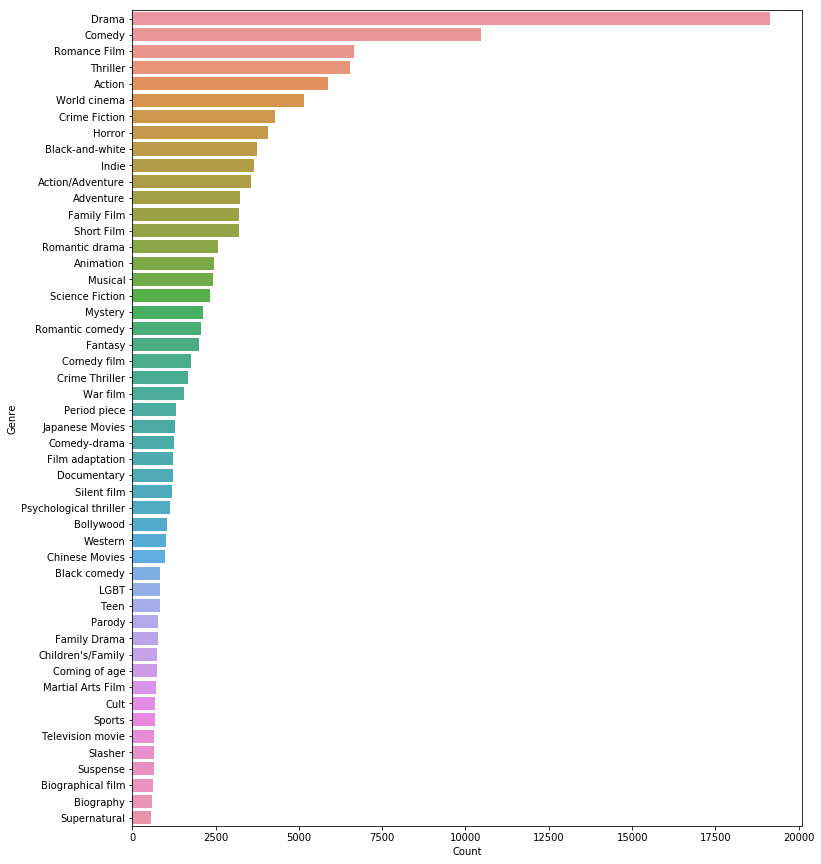

In [62]:
plt.figure(figsize=(12,15))
sns.barplot(data = g,y='Genre',x='Count')


In [41]:
import re

In [63]:
#clean text in plots
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text
    

In [64]:
movies_new['clean_plot'] = movies_new['plot'].apply(lambda x:clean_text(x))

C:\Users\asinha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
movies_new['clean_plot'].head()

0    None
1    None
2    None
3    None
4    None
Name: clean_plot, dtype: object

In [45]:
#remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [68]:
movies_new.drop(labels=['genre','plot'],axis=1,inplace=True)

C:\Users\asinha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [65]:
#function to remove stop words
def filter_stopwords(text):
    filter_plot = [w for w in text.split() if not w in stop_words]
    
    return ' '.join(filter_plot)

In [66]:
movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x:filter_stopwords(x))

C:\Users\asinha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
#movies_new['clean_plot']

In [79]:
def freq_words(x):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = nltk.FreqDist(all_words)
    
    words_df = pd.DataFrame({'words':list(fdist.keys()),'count':list(fdist.values())})
    
    
    return fdist.most_common(20)
    

In [80]:
freq_words(movies_new['clean_plot'])#most common words

[('one', 31947),
 ('back', 24380),
 ('two', 22025),
 ('film', 20384),
 ('tells', 18938),
 ('man', 18846),
 ('father', 18615),
 ('time', 18124),
 ('life', 17530),
 ('new', 17240),
 ('love', 17140),
 ('get', 17020),
 ('home', 16754),
 ('also', 16149),
 ('find', 16008),
 ('house', 15924),
 ('however', 15915),
 ('finds', 15586),
 ('family', 15509),
 ('later', 15459)]

In [90]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genres_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genres_new'])

In [92]:
#tfdif feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [93]:
# transform target variable
y = mb.transform(movies_new['genres_new'])
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=9)

In [95]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [96]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [97]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [98]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

C:\Users\asinha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 48 is present in all training examples.
  str(classes[c]))
C:\Users\asinha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 182 is present in all training examples.
  str(classes[c]))
C:\Users\asinha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 214 is present in all training examples.
  str(classes[c]))
C:\Users\asinha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 245 is present in all training examples.
  str(classes[c]))


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [99]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [102]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [101]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Action', 'Drama')

In [103]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.31540448604823657

In [106]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [111]:
t = 0.2 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [112]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.47014170040485825

In [113]:
# for new data
def infer_tags(q):
    q = clean_text(q)
    q = filter_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [118]:
for i in range(5): 
    k = xval.sample(1).index[0] #random pick
    print("Movie: ", movies_new['movie_name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",movies_new['genres_new'][k], "\n")


Movie:  How to Rob a Bank 
Predicted genre:  [('Action', 'Thriller')]
Actual genre:  ['Crime Fiction', 'Heist', 'Crime Comedy', 'Indie', 'Caper story', 'Action/Adventure', 'Comedy', 'Escape Film', 'Action'] 

Movie:  Truly, Madly, Deeply 
Predicted genre:  [('Drama',)]
Actual genre:  ['Romantic comedy', 'Heaven-Can-Wait Fantasies', 'Fantasy', 'Comedy', 'Music', 'Drama', 'Romantic drama', 'Romance Film', 'Romantic fantasy'] 

Movie:  Who's Minding the Mint? 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Comedy of Errors', 'Comedy'] 

Movie:  The Great Mom Swap 
Predicted genre:  [('Drama',)]
Actual genre:  ['Comedy-drama', 'Domestic Comedy', 'Comedy'] 

Movie:  Snow Cake 
Predicted genre:  [('Drama',)]
Actual genre:  ['Drama', 'Indie'] 



In [120]:
xval.sample(1).index[0]

33357